In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

from stochastic_simulation import StochasticSimulation

In [4]:
import numpy as np
from scipy.stats import poisson

def E_dist(max_time):
	pmf = list()
	for i in range(1, max_time):
		pmf.append(poisson.pmf(i, 5.2))
	pmf.append(1-np.sum(pmf))
	return np.array(pmf)


params = {
    'max_time_exposed': 14,
    'exposed_time_function': (lambda n: np.random.multinomial(n, E_dist(14))),
    
    'max_time_pre_ID': 2,
    'pre_ID_time_function': (lambda n: np.random.multinomial(n, np.array([0.8, 0.2]))),
    
    'max_time_ID': 10,
    'ID_time_function': (lambda n: np.random.multinomial(n, [0]*3+[1/7]*7)),
    
    'sample_QI_exit_function': (lambda n: np.random.binomial(n, 0.05)),
    'sample_QS_exit_function': (lambda n: np.random.binomial(n, 0.3)),
    
    'exposed_infection_p': 0.05,
    'expected_contacts_per_day': 3,
    
    'days_between_tests': 1,
    'test_population_fraction': 1/2,
    'test_protocol_QFNR': 0.1,
    'test_protocol_QFPR': 0.005,
    
    'perform_contact_tracing': False,
    'contact_tracing_constant': None,
    
    'pre_ID_state': 'detectable',
    
    'population_size': 34000,
    'initial_E_count': 0,
    'initial_pre_ID_count': 10,
    'initial_ID_count': 0
}

sim = StochasticSimulation(params)

In [5]:
dfs = []
for _ in range(100):
    dfs.append(sim.run_new_trajectory(50))

In [6]:
new_params = params.copy()
new_params['days_between_tests'] = 2
new_params['test_population_fraction'] = 1
new_sim = StochasticSimulation(new_params)
new_dfs = []
for _ in range(100):
    new_dfs.append(new_sim.run_new_trajectory(50))

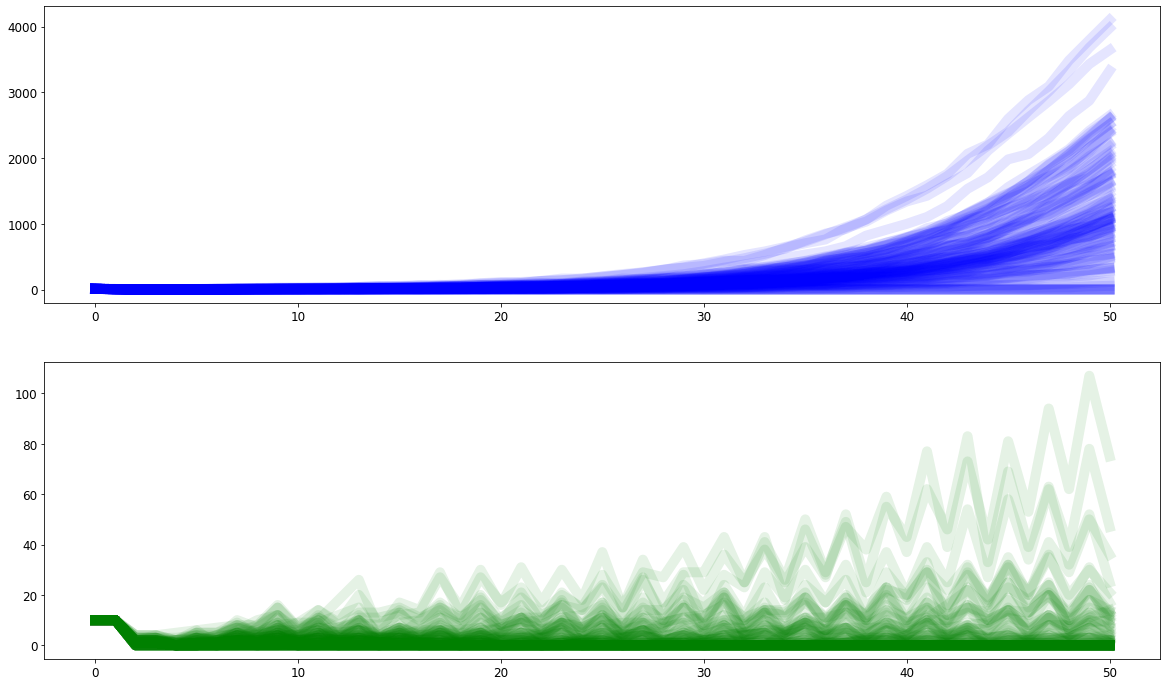

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 12

def add_plot(df, params, color='blue'):
    cols = ['ID_{}'.format(x) for x in range(params['max_time_ID'])] + \
            ['pre_ID_{}'.format(x) for x in range(params['max_time_pre_ID'])]
    plt.plot(df[cols].sum(axis=1), linewidth=10.0, alpha=0.1, color=color)    


plt.figure(figsize=(20,12))

plt.subplot(2,1,1)

for df in dfs:
    add_plot(df, params)

plt.subplot(2,1,2)
    
for df in new_dfs:
    add_plot(df, params, color='green')


        
plt.show()

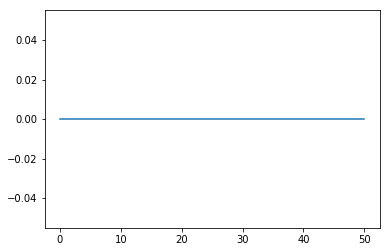

In [20]:
df = dfs[0]
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df[['ID_0','ID_1']].sum(axis=1))

In [11]:
df = sim.run_new_trajectory(50)

In [12]:
df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6
0,999,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,998,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,998,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,997,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,996,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
5,996,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0
6,996,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,995,2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,996,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,996,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
sim.sim_df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,980,0,0,0,4,2,3,1,6,4,...,0,0,0,0,0,0,0,0,0,0
0,979,0,1,1,3,3,1,0,5,2,...,0,0,0,0,0,1,1,1,2,0
0,961,0,2,1,9,5,2,6,4,1,...,1,0,0,0,2,1,1,2,0,0
0,939,1,4,2,10,9,8,7,4,6,...,0,0,0,1,1,1,2,0,0,1
0,912,2,9,5,13,16,12,10,9,4,...,0,0,1,1,1,1,0,1,1,0
0,883,3,15,6,24,19,16,6,7,8,...,0,3,1,2,2,0,1,1,1,1
0,850,2,21,6,27,26,13,9,21,9,...,2,1,3,2,0,1,1,1,2,0
0,792,2,25,6,39,28,25,14,20,15,...,1,7,3,4,1,1,1,2,2,0
0,690,3,32,9,57,43,47,22,34,16,...,11,2,5,1,1,3,3,3,2,2
0,542,5,49,15,75,84,58,43,44,23,...,4,7,4,2,3,4,3,4,6,1


In [3]:
sim.step()

In [7]:
sim.sim_df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,980,0,0,0,0,6,1,3,3,7,...,0,0,0,0,0,0,0,0,0,0
0,979,0,0,0,6,1,4,0,7,0,...,0,0,0,0,1,0,0,0,1,0
0,969,1,1,0,6,6,1,1,4,2,...,0,0,2,2,1,0,0,1,2,0
0,932,2,2,0,14,10,11,10,7,0,...,0,2,3,1,0,0,1,2,0,0


In [9]:
data = sim.get_current_state_vector()
labels = sim.get_state_vector_labels()

In [27]:
sim.E

array([12, 11,  4,  4])

In [28]:
labels

['S',
 'QS',
 'QI',
 'R',
 'E_0',
 'E_1',
 'E_2',
 'E_3',
 'pre_ID_0',
 'pre_ID_1',
 'ID_0',
 'ID_1',
 'ID_2',
 'ID_3',
 'ID_4',
 'ID_5',
 'ID_6',
 'ID_7',
 'ID_8',
 'ID_9',
 'ID_10',
 'ID_11',
 'ID_12',
 'ID_13']

In [17]:
labels

['S',
 'QS',
 'QI',
 'R',
 'E_0',
 'E_1',
 'E_2',
 'E_3',
 'pre_ID_0',
 'pre_ID_1',
 'ID_0',
 'ID_1',
 'ID_2',
 'ID_3',
 'ID_4',
 'ID_5',
 'ID_6',
 'ID_7',
 'ID_8',
 'ID_9',
 'ID_10',
 'ID_11',
 'ID_12',
 'ID_13']

In [12]:
import pandas as pd
df = pd.DataFrame(columns=labels)
newdf = pd.DataFrame([data], columns=labels)

In [13]:
df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13


In [14]:
newdf

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,947,1,4,1,9,8,12,4,0,3,...,0,2,1,0,2,0,0,3,0,0


In [16]:
df.append(newdf)

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,947,1,4,1,9,8,12,4,0,3,...,0,2,1,0,2,0,0,3,0,0


In [11]:
df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,947,1,4,1,9,8,12,4,0,3,...,0,2,1,0,2,0,0,3,0,0


In [33]:
new_df = pd.DataFrame([data], columns=labels)
df.append(new_df)

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,979,1,8,1,12,11,4,4,5,2,...,0,2,1,1,0,0,1,1,0,0
0,979,2,9,2,17,16,11,7,8,5,...,1,1,2,0,0,2,2,0,2,0


In [30]:
df

,S,QS,QI,R,E_0,E_1,E_2,E_3,pre_ID_0,pre_ID_1,...,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,ID_11,ID_12,ID_13
0,979,1,8,1,12,11,4,4,5,2,...,0,2,1,1,0,0,1,1,0,0


In [15]:
df.concat(pd.DataFrame(data))

AttributeError: 'DataFrame' object has no attribute 'concat'

In [13]:
import numpy as np

a = np.array([1,2,4])
b = [2]
c = np.array([1,3,3])
d = np.concatenate([a,b,c])

In [14]:
d

array([1, 2, 4, 2, 1, 3, 3])

In [20]:
np.random.binomial(10,0.3)

5

In [21]:
np.random.binomial(np.array([0,6,10]), 0.3)

array([0, 2, 2])

In [22]:
a = np.array([1,2,3])
b = np.array([2,2,2])
c = np.array([4,4,4])


In [24]:
d = c - a

In [25]:
d - b

array([ 1,  0, -1])

In [28]:
b = np.minimum(d,b)

In [29]:
b

array([2, 2, 1])

In [30]:
min(b)

1

In [32]:
np.random.choice([0,3,4], size=6, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'